In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
from numpy.fft import fft
from pylab import *
import os
from HD_DataLoader import *

In [2]:
fig_folder = os.path.join(os.getcwd(), 'Figures')
omron_data_folder = os.path.join(os.getcwd(), 'Omron_visit_tests', 'Microphone')

# generate database
dir_data = os.path.join(os.getcwd(), 'HD_data')
HD_object = HD(data_path=dir_data)
data = HD_object.generate_database()

---------------------------------------------------------
Generating database for HD's


In [3]:
id =0
data_tot = {}

for file_name in listdir(omron_data_folder):
    data_tot[id] = {}

    sr, data_omron = wav.read(join(omron_data_folder, file_name)) 
    
    data_tot[id]['SampleRate'] = sr
    data_tot[id]['Data'] = data_omron[:,0] 
    id=id+1

In [4]:
concat_mic_data_omron = []
mic_data = []
for i in range(len(data_tot)):
    mic_data.append(data_tot[i]['Data'])
    concat_mic_data_omron = np.concatenate(mic_data)

In [5]:
def make_fft(plot, fs):
    
    window = np.hanning(len(plot))
    plot = plot*window
    X = fft(plot)
    X= np.abs(X)
    X_db = 20*np.log10(X)
    N = len(X)
    nfft = np.arange(N)
    T = N/fs
    freq = nfft/T

    return freq, X_db

In [6]:
# this is a function to make the fft data
def make_fft_moving_mean(plot, fs):
    
    window = np.hanning(len(plot))
    plot = plot*window
    X = fft(plot)
    X= np.abs(X)
    X_db = 20*np.log10(X)
    
    # making the frequency vector
    N = len(X)
    nfft = np.arange(N)
    T = N/fs
    freq = nfft/T
    X_db = np.convolve(X_db, np.ones(100)/100, mode='same')
    
    return freq, X_db

In [7]:
def get_concat_sensor(sensor, selection):

    normal = []
    faulty = []
    concat_normal = []
    concat_faulty = []
    if sensor == 'Microphone':
        for testnr in data:
            if data[testnr]['attributes']['HD_status']== 0: #it is normal HD
                normal.append((data[testnr][sensor][selection][:,0]))
            elif data[testnr]['attributes']['HD_status']== 1:
                faulty.append((data[testnr][sensor][selection][:,0]))
            else:
                print("Undefined state")
        
        normal = np.array(normal)
        faulty = np.array(faulty)
            
        for i in range(len(normal)):
            concat_normal = np.concatenate((concat_normal, normal[i]))
        for i in range(len(faulty)):
            concat_faulty = np.concatenate((concat_faulty, faulty[i]))

    if sensor == 'Vibration':
        for testnr in data:
            if data[testnr]['attributes']['HD_status']== 0:
                normal.append((data[testnr][sensor][selection]))
            elif data[testnr]['attributes']['HD_status']== 1:
                faulty.append((data[testnr][sensor][selection]))
            else:
                print("Undefined state")

        for i in range(len(normal)):
            concat_normal = np.concatenate((concat_normal, normal[i]))
        for i in range(len(faulty)):
            concat_faulty = np.concatenate((concat_faulty, faulty[i]))

    if sensor == 'dSpace':
        for testnr in data:
            if data[testnr]['attributes']['HD_status']== 0: #it is normal HD
                normal.append((data[testnr][sensor][selection]))
            elif data[testnr]['attributes']['HD_status']== 1:
                faulty.append((data[testnr][sensor][selection]))
            else:
                print("Undefined state")
        
        for i in range(len(normal)):
            concat_normal = np.concatenate((concat_normal, normal[i]))
            
        for i in range(len(faulty)):
            concat_faulty = np.concatenate((concat_faulty, faulty[i]))    


    return concat_normal, concat_faulty

In [8]:
def plot_mic_data(plot, fs, plottitle):
    freq, X_db = make_fft(plot, fs)

    plt.figure(figsize = (10, 4))
    #title for both subplots
    # HDstatus = data[testnr]['attributes']['HD_status']
    plt.suptitle(plottitle)
    plt.subplot(121)
    plt.semilogx(freq, X_db, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    plt.subplot(122)
    plt.plot(plot, 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()


In [9]:
# Plot normal and faulty concatenated data
# sensortype = 'Microphone'
# selection = 'Data'
# fs = 44100
# concat_normal, concat_faulty = get_concat_sensor('Microphone', 'Data')
# plottitle1 = sensortype + ' ' +  selection  + ' '  + 'faulty'
# plottitle2 = sensortype + ' ' +  selection  + ' '  + 'normal'
# plot_mic_data(concat_faulty,fs, plottitle1)
# plot_mic_data(concat_normal,fs, plottitle2)

In [10]:
def plot_vibration_data(plot, fs, plottitle):
    freq, X_db = make_fft(plot, fs)
    
    plt.figure(figsize = (10, 4))
    #title for both subplots
    #HDstatus = data[testnr]['attributes']['HD_status']
    plt.suptitle(plottitle)
    plt.subplot(121)
    plt.semilogx(freq, X_db, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    plt.subplot(122)
    plt.plot(plot, 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

In [11]:
# plot the concatenated vibration data
# sensortype = 'Vibration'
# selection = 'Z_vibr'
# fs = 2048
# concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
# plottitle1 = sensortype + ' ' +  selection  + ' '  + 'faulty'
# plottitle2 = sensortype + ' ' +  selection  + ' '  + 'normal'
# plot_vibration_data(concat_faulty, fs, plottitle1)
# plot_vibration_data(concat_normal, fs, plottitle2)

In [12]:
def plot_dspace_data(plot, fs, plottitle):

    freq, X_db = make_fft(plot, fs)
    
    plt.figure(figsize = (10, 4))
    plt.suptitle(plottitle)
    plt.subplot(121)
    plt.semilogx(freq, X_db, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(122)
    plt.plot(plot, 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

In [13]:
# sensortype = 'dSpace'
# selection = 'i_motor_LP'
# fs = 500
# concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
# plottitle1 = sensortype + ' ' +  selection  + ' '  + 'faulty data'
# plottitle2 = sensortype + ' ' +  selection  + ' '  + 'normal data'
# plot_dspace_data(concat_faulty, fs, plottitle1)
# plot_dspace_data(concat_normal, fs, plottitle2)

From here the FFT data is plotted over each other for better comparison of normal and faulty FFT's, also a grid is added

In [14]:
# Adjust the plotsettings in this code:
fontsize = 20
ticksize = 15
plt.style.use('science')
# set the visiblity to bright
params = {  "xtick.color" : "black",
            "ytick.color" : "black",
            "axes.labelsize": ticksize,
            "axes.labelcolor": "black",
            "font.size": fontsize,
            "text.usetex": False} 
plt.rcParams.update(params)

In [15]:
sensortype = 'Microphone'
selection = 'Data'
fs = 44100
concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
freq1, X_db1 = make_fft(concat_normal, fs)
freq2, X_db2 = make_fft(concat_faulty, fs)
freq3, X_db3 = make_fft_moving_mean(concat_normal, fs)
freq4, X_db4 = make_fft_moving_mean(concat_faulty, fs)

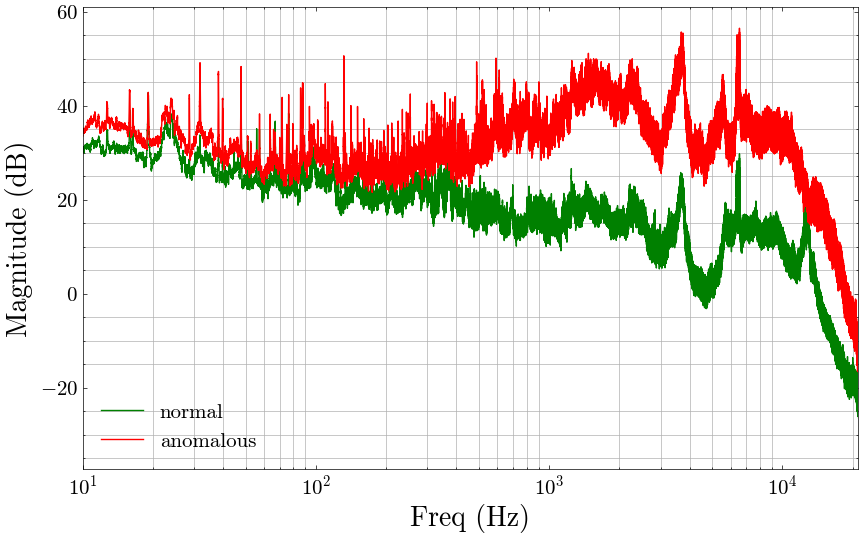

In [16]:
file_path = os.path.join(fig_folder, 'FFT_mic.eps')
plt.figure(figsize = (10, 6))
# plt.semilogx(freq1, X_db1, label = "normal data")
# plt.semilogx(freq2, X_db2, label = "faulty data")
plt.semilogx(freq3, X_db3, label = "normal", color = 'green')
plt.semilogx(freq4, X_db4, label = "anomalous", color = 'red')
plt.xlabel('Freq (Hz)', fontdict={'fontsize': fontsize})
plt.ylabel('Magnitude (dB)', fontdict={'fontsize': fontsize})
xlim((10, 21000))
plt.xticks(fontsize = ticksize)
plt.yticks(fontsize = ticksize)
plt.legend(fontsize = ticksize, loc = 'lower left')
plt.grid(True, which='minor')
# plt.title('FFT:'+ ' ' + 'microphone', fontdict={'fontsize': fontsize})
plt.savefig(file_path, format='eps')
plt.show()

In [17]:
sensortype = 'dSpace'
# if you want the motor speed set selection to 'speed_motor' in stead of 'w_out'
selection = 'i_motor_LP'
fs = 500
concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
freq5, X_db5 = make_fft(concat_normal, fs)
freq6, X_db6 = make_fft(concat_faulty, fs)
freq7, X_db7 = make_fft_moving_mean(concat_normal, fs)
freq8, X_db8 = make_fft_moving_mean(concat_faulty, fs)

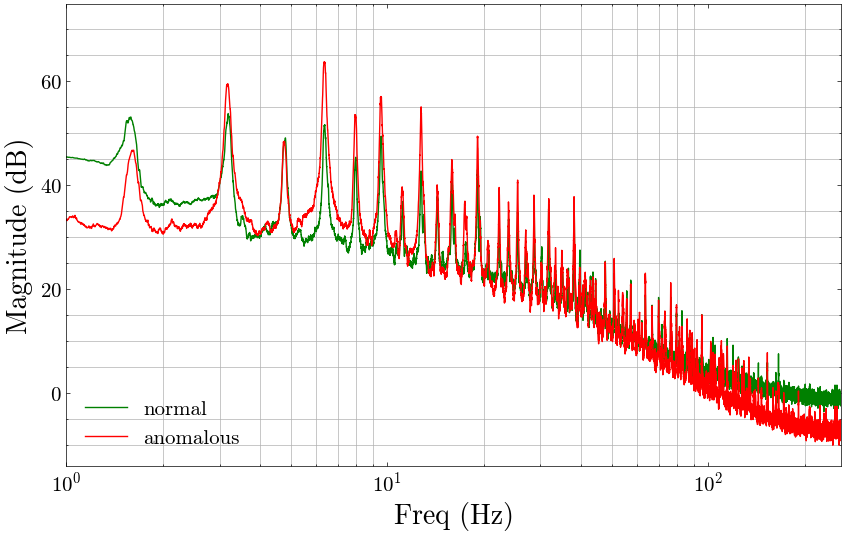

In [18]:
file_path = os.path.join(fig_folder, 'FFT_imotorLP.eps')

plt.figure(figsize = (10, 6))
# plt.semilogx(freq5, X_db5, label = "normal data")
# plt.semilogx(freq6, X_db6, label = "faulty data")
plt.semilogx(freq7, X_db7, label = "normal", color = 'green')
plt.semilogx(freq8, X_db8, label = "anomalous", color = 'red')
plt.xlabel('Freq (Hz)', fontdict={'fontsize': fontsize})
plt.ylabel('Magnitude (dB)', fontdict={'fontsize': fontsize})
plt.xticks(fontsize = ticksize)
plt.yticks(fontsize = ticksize)
xlim((1, 260))
plt.legend(fontsize = ticksize, loc = 'lower left')
plt.grid(True, which='minor')
# plt.title('FFT:' + ' ' + 'motor current', fontdict={'fontsize': fontsize})
plt.savefig(file_path, format='eps')
plt.show()

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substitutin

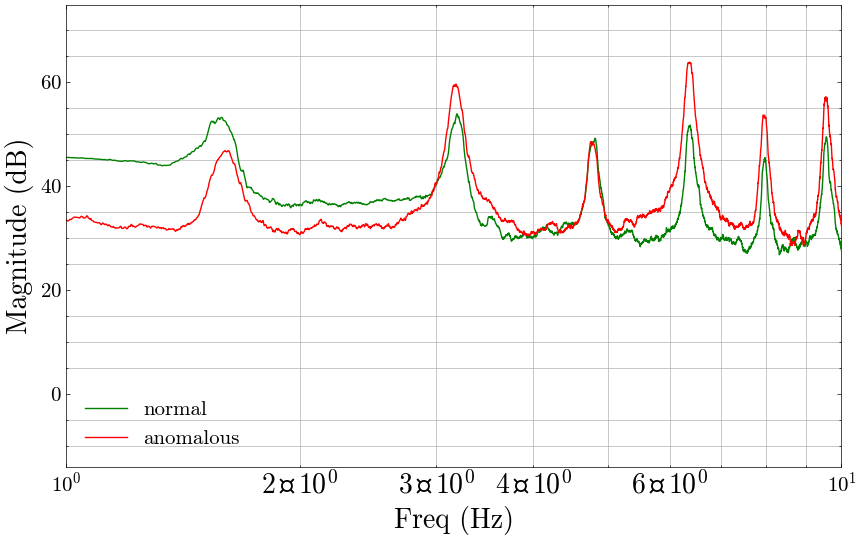

In [19]:
# ZOOMED IMOTORLP

file_path = os.path.join(fig_folder, 'FFT_imotorLPzoomed.eps')
plt.figure(figsize = (10, 6))
# plt.semilogx(freq5, X_db5, label = "normal data")
# plt.semilogx(freq6, X_db6, label = "faulty data")
plt.semilogx(freq7, X_db7, label = "normal", color = 'green')
plt.semilogx(freq8, X_db8, label = "anomalous", color = 'red')
plt.xlabel('Freq (Hz)', fontdict={'fontsize': fontsize})
plt.ylabel('Magnitude (dB)', fontdict={'fontsize': fontsize})
plt.xticks(fontsize = ticksize)
plt.yticks(fontsize = ticksize)
xlim((1, 10))
plt.legend(fontsize = ticksize, loc = 'lower left')
plt.grid(True, which='minor')
# plt.title('FFT:' + ' ' + 'motor current', fontdict={'fontsize': fontsize})
plt.savefig(file_path, format='eps')
plt.show()

In [20]:
concat_mic_data_omron
fs = 44100
freq9, X_db9 = make_fft_moving_mean(concat_mic_data_omron, fs)

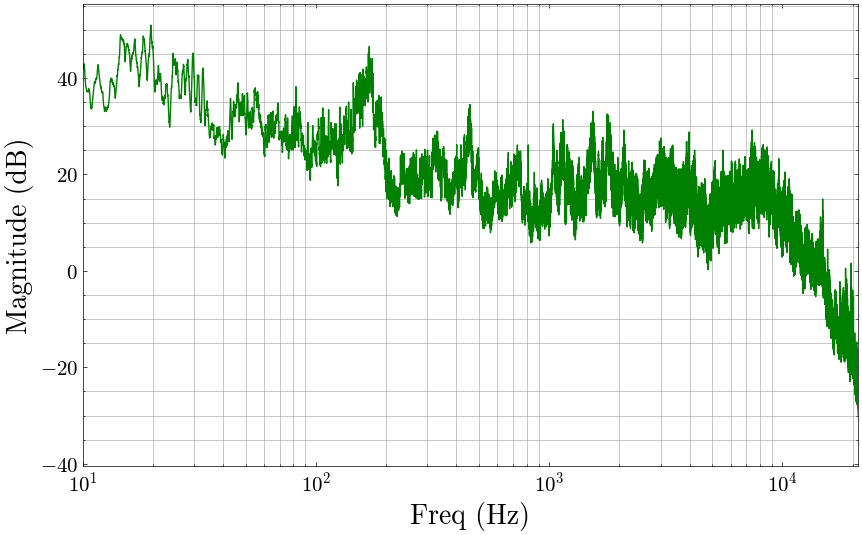

In [21]:
# ZOOMED IMOTORLP

file_path = os.path.join(fig_folder, 'FFT_mic_omron_testday.eps')
plt.figure(figsize = (10, 6))
plt.semilogx(freq9, X_db9, label = "normal", color = 'green')
plt.xlabel('Freq (Hz)', fontdict={'fontsize': fontsize})
plt.ylabel('Magnitude (dB)', fontdict={'fontsize': fontsize})
plt.xticks(fontsize = ticksize)
plt.yticks(fontsize = ticksize)
xlim((10, 21000))
plt.grid(True, which='minor')
plt.savefig(file_path, format='eps')
plt.show()